# Área de Dados

A melhoria do processamento dos computadores, o surgimento de tecnologias como computação em nuvem, machine e a possibilidade da coleta de dados de diversos equipamentos através da Internet das Coisas (_Internet of Things_, _IoT_) fez com que uma enorme quantidade de dados (_Big Data_) começasse a ser produzido.

Esses dados, quando refinados, analisados e interpretados, podem trazer poderosas descobertas que melhoram as tomadas de decisão, ajudando a construir estratégias de mercado/negócios e a diminuir custos.

Existem diversas possibilidades de atuação na área, como por exemplo, na coleta e limpeza dos dados, análises exploratórias desses dados, construção e implantação de modelos de aprendizado de máquina (_machine learning_), e interpretação dos resultados desses modelos.

Os profissionais da área de dados podem ser divididos nas seguintes profissões:
- Engenheiro de dados: responsável pela coleta e limpeza dos dados
- Analista de dados: pode realizar limpeza dos dados e também é responsável pela análise exploratória desses dados
- Engenheiro de _machine learning_: constrói e implanta os modelos
- Cientista de dados: pode realizar qualquer uma dessas etapas

Neste estudo analisaremos os dados coletados na pesquisa [State of Data Brazil](https://www.stateofdata.com.br/) do ano de 2022, que fornece um panorama sobre o mercado de trabalho na área de dados no Brasil. Essa pesquisa foi realizada pela **Data Hackers** e a **Bain & Company**, no período de 10 de outubro a 28 de novembro de 2022. O arquivo .csv com as respostas dos 4.271 participantes pode ser obtido na plataforma [Kaggle](https://www.kaggle.com/datasets/datahackers/state-of-data-2022).

# State of Data Brazil 2022

In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('State_of_data_2022.csv', sep = ',')
df.drop("('P0', 'id')", axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Columns: 352 entries, ('P1_a ', 'Idade') to ('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')
dtypes: bool(1), float64(284), object(67)
memory usage: 11.4+ MB


A pesquisa é dividida em 8 partes, totalizando 352 colunas (contando com a coluna de id, identificada como P0):

Parte 1 - Dados demográfico
Parte 2 - Dados sobre carreira
Parte 3 - Desafios dos gestores de times de dados
Parte 4 - Conhecimentos na área de dados
Parte 5 - Objetivos na área de dados
Parte 6 - Conhecimentos em Engenharia de Dados/DE
Parte 7 - Conhecimentos em Análise de Dados/DA
Parte 8 - Conhecimentos em Ciências de Dados/DS

Algumas perguntas podem ter respostas multi-valoradas, então ocupando mais de uma coluna no dataset. Dessa forma, cada coluna é identificada como uma tupla (Pergunta,Alternativa escolhida), e as perguntas são divididas em Parte, Letra da pergunta e Número da opção escolhida:

    P3_a_1 = Parte 3, pergunta (a), opção (1)

A fim de garantir o anonimato dos respondentes, os realizadores da pesquisa retiraram respostas que possam mostrar outliers e que fariam ser possível o reconhecimento de quem respondeu.

A seguir são mostradas as perguntas mais gerais para cada parte do questionário.

In [3]:
# Separando por partes
df_parte_1 = df.filter(like = 'P1', axis = 1)
df_parte_2 = df.filter(like = 'P2', axis = 1)
df_parte_3 = df.filter(like = 'P3', axis = 1)
df_parte_4 = df.filter(like = 'P4', axis = 1)
df_parte_5 = df.filter(like = 'P5', axis = 1)
df_parte_6 = df.filter(like = 'P6', axis = 1)
df_parte_7 = df.filter(like = 'P7', axis = 1)
df_parte_8 = df.filter(like = 'P8', axis = 1)

In [4]:
def get_perguntas(df_parte: pd.DataFrame,parte:int) -> None:
    columns   = list(df_parte.columns)
    print(f'Parte {parte} - Total de colunas: {len(columns)}')
    count = 0
    for c in columns:
        aux            = c.split('(')[1].split(')')[0]
        identificador1 = aux.split(',')[0]
        if len(identificador1.split('_')) <= 2:
            print(aux)
            count += 1
    print(f'Total de perguntas gerais: {count}')

In [5]:
get_perguntas(df_parte_1,1)

Parte 1 - Total de colunas: 15
'P1_a ', 'Idade'
'P1_b ', 'Genero'
'P1_c ', 'Cor/raca/etnia'
'P1_d ', 'PCD'
'P1_e ', 'experiencia_profissional_prejudicada'
'P1_f ', 'aspectos_prejudicados'
'P1_g ', 'vive_no_brasil'
'P1_i ', 'Estado onde mora'
'P1_j ', 'Mudou de Estado?'
'P1_k ', 'Regiao de origem'
'P1_l ', 'Nivel de Ensino'
'P1_m ', 'Área de Formação'
Total de perguntas gerais: 12


In [6]:
get_perguntas(df_parte_2,2)

Parte 2 - Total de colunas: 36
'P2_a ', 'Qual sua situação atual de trabalho?'
'P2_b ', 'Setor'
'P2_c ', 'Numero de Funcionarios'
'P2_d ', 'Gestor?'
'P2_e ', 'Cargo como Gestor'
'P2_f ', 'Cargo Atual'
'P2_g ', 'Nivel'
'P2_h ', 'Faixa salarial'
'P2_i ', 'Quanto tempo de experiência na área de dados você tem?'
'P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?'
'P2_k ', 'Você está satisfeito na sua empresa atual?'
'P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?'
'P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?'
'P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?'
'P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?'
'P2_p ', 'Atualmente qual a sua forma de trabalho?'
'P2_q ', 'Qual a forma de trabalho ideal para você?'
'P2_r ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua

In [7]:
get_perguntas(df_parte_3,3)

Parte 3 - Total de colunas: 38
'P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?'
'P3_b ', 'Quais desses papéis/cargos fazem parte do time 
'P3_c ', 'Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?'
'P3_d ', 'Quais são os 3 maiores desafios que você tem como gestor no atual momento?'
Total de perguntas gerais: 4


In [8]:
get_perguntas(df_parte_4,4)

Parte 4 - Total de colunas: 100
'P4_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?'
'P4_b ', 'Quais das fontes de dados listadas você já analisou ou processou no trabalho?'
'P4_c ', 'Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?'
'P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?'
'P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?'
'P4_f ', 'Entre as linguagens listadas abaixo, qual é a sua preferida?'
'P4_g ', 'Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?'
'P4_g ', 'Quais das opções de Cloud listadas abaixo você utiliza no trabalho?'
'P4_h ', 'Dentre as opções listadas, qual sua Cloud preferida?'
'P4_i ', 'Microsoft PowerBI'
Total de perguntas gerais: 10


In [9]:
get_perguntas(df_parte_5,5)

Parte 5 - Total de colunas: 4
'P5_a ', 'Qual seu objetivo na área de dados?'
'P5_b ', 'Qual oportunidade você está buscando?'
'P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?'
'P5_d ', 'Como tem sido a busca por um emprego na área de dados?'
Total de perguntas gerais: 4


In [10]:
get_perguntas(df_parte_6,6)

Parte 6 - Total de colunas: 59
'P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?'
'P6_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Engineer?'
'P6_c ', 'Sua organização possui um Data Lake?'
'P6_d ', 'Qual tecnologia utilizada como plataforma do Data Lake?'
'P6_e ', 'Sua organização possui um Data Warehouse?'
'P6_f ', 'Qual tecnologia utilizada como plataforma do Data Warehouse?'
'P6_g ', 'Quais as ferramentas de gestão de Qualidade de dados, Metadados e catálogo de dados você utiliza no trabalho?'
'P6_h ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo?'
Total de perguntas gerais: 8


In [11]:
get_perguntas(df_parte_7,7)

Parte 7 - Total de colunas: 50
'P7_1 ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?'
'P7_b ', 'Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?'
'P7_c ', 'Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?'
'P7_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?'
Total de perguntas gerais: 4


In [12]:
get_perguntas(df_parte_8,8)

Parte 8 - Total de colunas: 50
'P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?'
'P8_b ', 'Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?'
'P8_3 ', 'Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?'
'P8_d ', 'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?'
Total de perguntas gerais: 4


E a seguir é mostrada a contagem dos tipos de dados para cada parte do questionário

In [13]:
def get_tipos(df_parte: pd.DataFrame,parte:str) -> pd.DataFrame:
    tipos    = df_parte.dtypes.values.tolist()
    df_tipos = pd.DataFrame(tipos,columns=[parte])
    df_aggr  = df_tipos.groupby([parte])[parte].count()
    return df_aggr

def get_df_tipos() -> pd.DataFrame:
    dict_columns = {x: f'P{x+1}' for x in range(8)}
    dfs_tipos = []
    dfs_tipos.append(get_tipos(df_parte_1,'P1'))
    dfs_tipos.append(get_tipos(df_parte_2,'P2'))
    dfs_tipos.append(get_tipos(df_parte_3,'P3'))
    dfs_tipos.append(get_tipos(df_parte_4,'P4'))
    dfs_tipos.append(get_tipos(df_parte_5,'P5'))
    dfs_tipos.append(get_tipos(df_parte_6,'P6'))
    dfs_tipos.append(get_tipos(df_parte_7,'P7'))
    dfs_tipos.append(get_tipos(df_parte_8,'P8'))
    df_tipos = pd.concat(dfs_tipos,axis=1,ignore_index=True)
    df_tipos.rename(columns=dict_columns,inplace=True)
    df_tipos = df_tipos.fillna(0)
    df_tipos = df_tipos.astype('int32',errors='ignore')
    df_tipos['Total'] = df_tipos.loc[df_tipos.index].sum(axis=1)
    return df_tipos

In [14]:
df_tipos = get_df_tipos()
display(df_tipos)

,P1,P2,P3,P4,P5,P6,P7,P8,Total
bool,1,0,0,0,0,0,0,0,1
float64,1,17,34,89,0,51,46,46,284
object,13,19,4,11,4,8,4,4,67


# Estatísticas gerais da idade dos profissionais

A coluna ('P1_a ', 'Idade') é a única do dataset que possui valores contínuos. As outras colunas de tipo float64 apenas indicam se o respondente escolheu uma dada opção de resposta (1 se escolheu a resposta e 0 para se não a escolheu).

Tirando algumas estatísticas básicas temos que a idade digitada pelos respondentes varia de 18 a 54 anos, com média de 31 anos e mediana de 30 anos.



,Idade
count,4197.000000
mean,31.169168
std,6.902803
min,18.000000
25%,26.000000
50%,30.000000
75%,35.000000
max,54.000000


Text(0, 0.5, 'Idade')

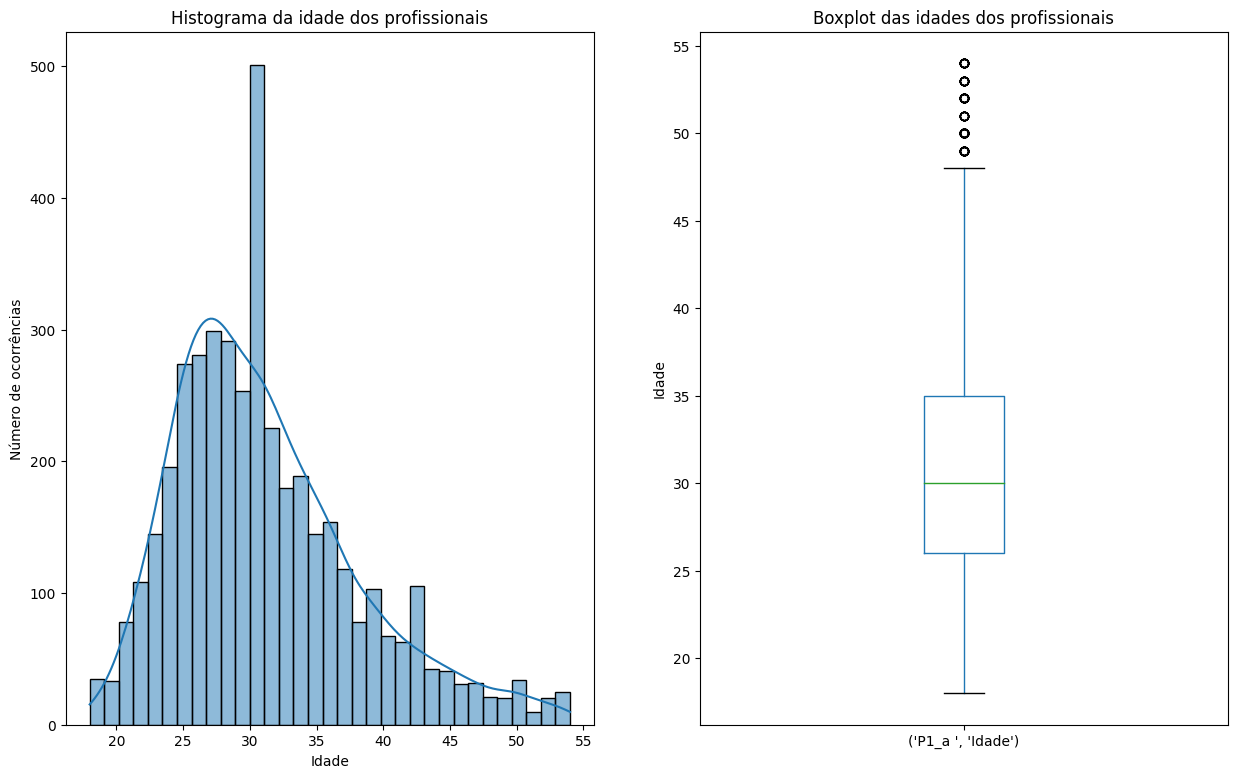

In [15]:
df_idade = pd.DataFrame(df_parte_1["('P1_a ', 'Idade')"].describe())
df_idade.rename(columns={"('P1_a ', 'Idade')": "Idade"}, inplace=True)
display(df_idade)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

sns.histplot(data=df_parte_1, x="('P1_a ', 'Idade')",ax=ax[0], kde=True);
ax[0].set_title('Histograma da idade dos profissionais')
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Número de ocorrências')

df_parte_1.boxplot(column=["('P1_a ', 'Idade')"], ax=ax[1], grid=False)
ax[1].set_title('Boxplot das idades dos profissionais')
ax[1].set_ylabel('Idade')

Text(0.5, 1.0, 'Profissionais por idade')

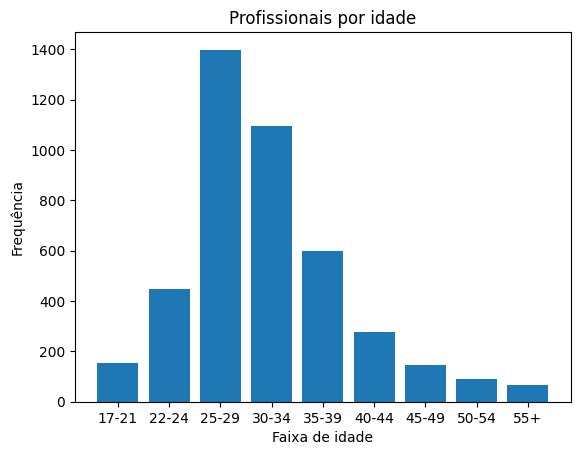

In [21]:
# por faixa de idade
ax = plt.bar(data = df_parte_1, x = df_parte_1.groupby("('P1_a_1 ', 'Faixa idade')")["('P1_a_1 ', 'Faixa idade')"].count().index,
        height = df_parte_1.groupby("('P1_a_1 ', 'Faixa idade')")["('P1_a_1 ', 'Faixa idade')"].count().values)
plt.xlabel('Faixa de idade')
plt.ylabel('Frequência')
plt.title('Profissionais por idade')

A maioria dos profissionais concentra-se na faixa etária de 25 a 34 anos.

# Distribuição das idades dos profissionais por gênero e nível de carreira

([<matplotlib.patches.Wedge at 0x79c6263d9720>,
 [Text(0.7832451088357187, 0.772351668273542, 'Feminino'),
  Text(-0.7900461291343092, -0.765393437285619, 'Masculino'),
  Text(1.0999569679494896, -0.009729782082127532, 'Não informado')],
 [Text(0.4272246048194829, 0.42128272814920464, '24.8%'),
  Text(-0.4309342522550777, -0.4174873294285194, '74.9%'),
  Text(0.5999765279724488, -0.005307153862978653, '0.3%')])

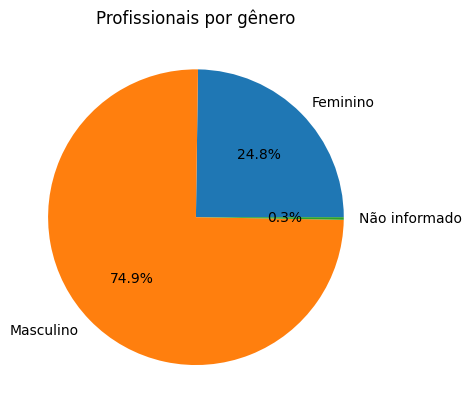

In [20]:
genero = df_parte_1.groupby("('P1_b ', 'Genero')")["('P1_b ', 'Genero')"].count()
labels = 'Feminino', 'Masculino',  'Não informado'
plt.title('Profissionais por gênero')
plt.pie(genero, labels = labels, autopct='%1.1f%%')

Ao examinarmos o perfil dos profissionais na área de Dados, observamos uma significativa disparidade: cerca de 75% são homens, 24.8% são mulheres, e uma proporção ainda menor não especificou o gênero. Esse padrão se estende para as outras áreas de TI, onde, segundo a Pesquisa Nacional por Amostra de Domicílios (PNAD) apenas 20% dos profissionais de TI são mulheres.

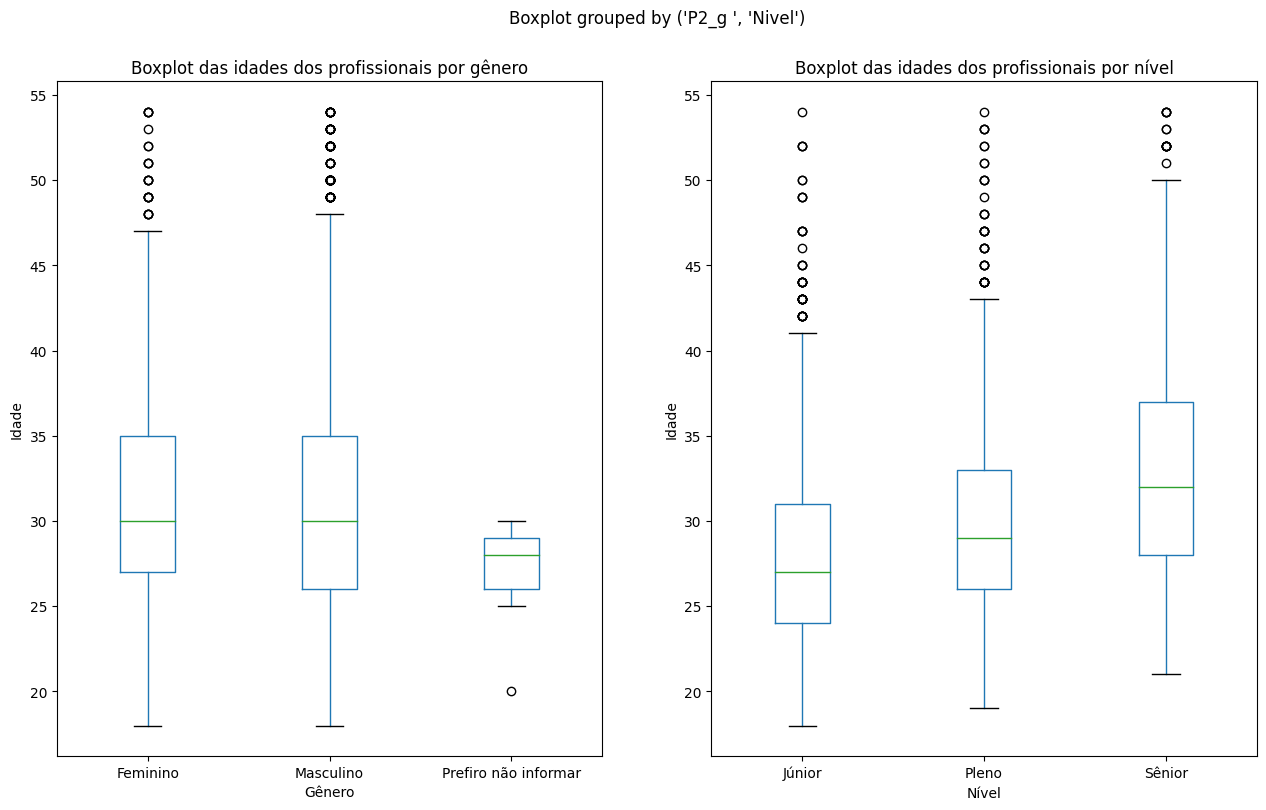

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,9))
df_parte_1.boxplot(column=["('P1_a ', 'Idade')"], by="('P1_b ', 'Genero')", ax=ax[0], grid=False);
ax[0].set_title('Boxplot das idades dos profissionais por gênero')
ax[0].set_ylabel('Idade')
ax[0].set_xlabel('Gênero')

df.boxplot(column=["('P1_a ', 'Idade')"], by="('P2_g ', 'Nivel')", ax=ax[1], grid=False);
ax[1].set_title('Boxplot das idades dos profissionais por nível')
ax[1].set_ylabel('Idade')
ax[1].set_xlabel('Nível');

# Escolaridade

Text(0.5, 1.0, 'Profissionais por escolaridade')

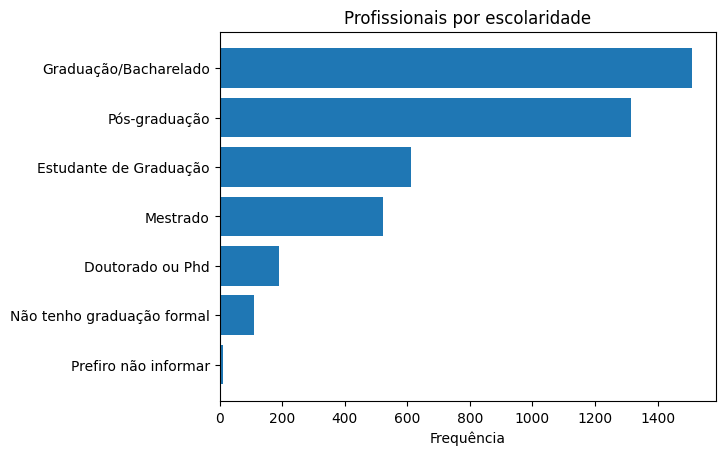

In [22]:
index = df_parte_1.groupby("('P1_l ', 'Nivel de Ensino')")["('P1_l ', 'Nivel de Ensino')"].count().sort_values(ascending=True).index
values = df_parte_1.groupby("('P1_l ', 'Nivel de Ensino')")["('P1_l ', 'Nivel de Ensino')"].count().sort_values(ascending=True).values
plt.xlabel('Frequência')
plt.barh(index, values)
plt.title('Profissionais por escolaridade')

Os profissionais apresentam um elevado nível de educação formal, abrangendo graduação e pós-graduação.

# Número de profissionais por Estado e Região do Brasil

In [17]:
num_profissionais_nao_moram_brasil = df_parte_1[df_parte_1["('P1_g ', 'vive_no_brasil')"]==False].shape[0]
mascara_sem_estado                 = (df_parte_1["('P1_i ', 'Estado onde mora')"].isnull()) & (df_parte_1["('P1_g ', 'vive_no_brasil')"]==True)
num_profissionais_nao_responderam  = df_parte_1[mascara_sem_estado].shape[0]

print(f'Número de profissionais que não moram no Brasil: {num_profissionais_nao_moram_brasil}')
print(f'Número de profissionais que não tem Estado: {num_profissionais_nao_responderam}')

Número de profissionais que não moram no Brasil: 100
Número de profissionais que não tem Estado: 15


In [18]:
df_profissionais_por_estado2 = df_parte_1.groupby("('P1_i_1 ', 'uf onde mora')")["('P1_i_1 ', 'uf onde mora')"].count().sort_values().to_frame()
df_profissionais_por_estado2.rename(columns={"('P1_i_1 ', 'uf onde mora')": "Contagem"},inplace=True)
df_profissionais_por_estado2.reset_index(inplace=True)

In [19]:
shp_brasil = 'BR_UF_2022/BR_UF_2022.shp'
gdf        = gpd.read_file(shp_brasil)
merged_df  = pd.merge(left=gdf,right=df_profissionais_por_estado2,
                     how='left', left_on='SIGLA_UF', right_on="('P1_i_1 ', 'uf onde mora')")
merged_df.fillna(0,inplace=True)


ERROR:fiona._env:BR_UF_2022/BR_UF_2022.shp: No such file or directory


DriverError: ignored

In [ ]:
coluna = "Contagem"
vmin = merged_df[coluna].min()
vmax = merged_df[coluna].max()
cmap = 'YlGnBu'
fig,ax = plt.subplots(1,figsize=(12,9))
ax.axis('off')
merged_df.plot(column=coluna, ax=ax, edgecolor='black', linewidth=1, cmap=cmap)
ax.set_title('Profissionais por Estado do Brasil')
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax),
                           cmap=cmap)
sm._A = []
cbaxes = fig.add_axes([0.15,0.25,0.01,0.4])
cbar   = fig.colorbar(sm, cax=cbaxes)

In [ ]:
num_prof_AM                = df_profissionais_por_estado['Amazonas (AM)']
num_prof_PA                = df_profissionais_por_estado['Pará (PA)']
mascara_prof_norte_sem_est = (df_parte_1["('P1_i_2 ', 'Regiao onde mora')"] == 'Norte') & (df_parte_1["('P1_i ', 'Estado onde mora')"].isnull())
num_prof_norte_sem_estado  = df_parte_1[mascara_prof_norte_sem_est].shape[0]

print(f'Número de profissionais no Norte: {df_profissionais_regiao["Norte"]}')
print(f'Número de profissionais no Amazonas: {num_prof_AM}')
print(f'Número de profissionais no Pará: {num_prof_PA}')
print(f'Número de profissionais no Norte mas sem Estado: {num_prof_norte_sem_estado}')

O Estado de São Paulo possui a grande maioria de profissionais e outros dois Estados do Sudeste, Minas Gerais e Rio de Janeiro, ficam com o 2º e 3º lugares, explicando a região Sudeste como a que mais tem profissionais de dados no Brasil. Os Estados do Acre, Amapá, Roraima, Tocantins (Norte) e Mato Grosso (Centro-Oeste) não tiveram profissionais.

Porém, ao filtrar quais profissionais são da região Norte mas não possuem resposta em Estado, obtemos a quantidade de 15, que é exatamente a quantidade que encontramos anteriormente de profissionais que não tem Estado.


# Número de profissionais por Estado e Região do Brasil separados pelo gênero

In [ ]:
coluna_genero = "('P1_b ', 'Genero')"
coluna_estado = "('P1_i ', 'Estado onde mora')"
df_genero_por_estado = df_parte_1.groupby([coluna_estado,coluna_genero]).size()
df_genero_por_estado.unstack().sort_values('Masculino').plot(kind='barh',stacked=True, ylabel= 'Estado', xlabel="Número de profissionais",
                                    title='Gênero dos profissionais por Estado');

In [ ]:
def tipo_profissionais_por_regiao(df_parte: pd.DataFrame, tipo: str, coluna_tipo: str, campo_sort: str) -> None:
    coluna_regiao      = "('P1_i_2 ', 'Regiao onde mora')"
    df_tipo_por_regiao = df_parte_1.groupby([coluna_regiao,coluna_tipo]).size().unstack().sort_values(campo_sort)
    df_tipo_por_regiao.plot(kind='barh',stacked=True, ylabel= 'Região', xlabel="Número de profissionais",
                                    title=f'{tipo} por Região')
    return df_tipo_por_regiao

In [ ]:
_ = tipo_profissionais_por_regiao(df_parte_1, 'Gênero dos profissionais', "('P1_b ', 'Genero')", 'Masculino')

Em relação ao gênero, como visto anteriormente, temos uma alta predominância do gênero Masculino, o que também é visto para todos os Estados do Brasil.

Dividindo o gênero por regiões, podemos confirmar um maior número de profissionais do gênero Feminino no Estado do Sudeste, o que é explicado no gráfico por Estado, com SP, MG, RJ tendo a maior quantidade de profissionais desse gênero.


# Cor/raça/etnia

Text(0.5, 1.0, 'Profissionais por cor/raça/etnia')

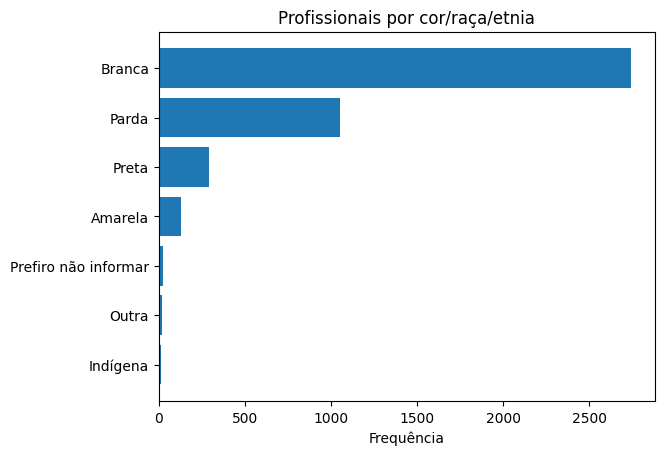

In [25]:
index = df_parte_1.groupby("('P1_c ', 'Cor/raca/etnia')")["('P1_c ', 'Cor/raca/etnia')"].count().sort_values(ascending=True).index
values = df_parte_1.groupby("('P1_c ', 'Cor/raca/etnia')")["('P1_c ', 'Cor/raca/etnia')"].count().sort_values(ascending=True).values
plt.xlabel('Frequência')
plt.barh(index, values)
plt.title('Profissionais por cor/raça/etnia')

A análise dos dados coletados pela pesquisa revela uma clara predominância de profissionais que se autodeclaram como brancos. Essa tendência levanta questões sobre a diversidade e inclusão na área de dados, destacando a necessidade de esforços para tornar o campo mais representativo de diferentes grupos étnicos.

# Número de profissionais por Estado e Região do Brasil separados por Cor/raça/etnia

In [23]:
df_etnia = tipo_profissionais_por_regiao(df_parte_1, 'Cor/raça/etnia dos profissionais', "('P1_c ', 'Cor/raca/etnia')", 'Branca')


NameError: ignored

In [ ]:
df_etnia.fillna(0,inplace=True)
total_etnia_regiao   = df_etnia.sum(axis=1)
df_etnia_porcentagem = df_etnia.divide(total_etnia_regiao,axis=0) * 100
display(df_etnia_porcentagem)

Em relação à cor, raça e etnia, já tinha sido mostrada a maior predominância de pessoas brancas. No entanto, nas regiões Nordeste e Norte há uma menor diferença na proporção entre profissionais brancos e pardos (~49% e ~43.5% para o Norte; ~46% e 41% para o Nordeste).

O Sul é a região com maior predominância de profissionais brancos, chegando a ~81% dos profissionais na região.

In [ ]:
df_pcd = tipo_profissionais_por_regiao(df_parte_1, 'Profissionais PCD', "('P1_d ', 'PCD')", 'Não')

In [ ]:
df_pcd.fillna(0,inplace=True)
display(df_pcd)
total_pcd  = df_pcd['Sim'].sum()
df_pcd_sim = pd.DataFrame(100 * df_pcd['Sim']/total_pcd).sort_values(by='Sim',ascending=False)
display(df_pcd_sim)

Pelo questionário são muito pouco profissionais PCD na área de dados no Brasil, sendo o Sudeste a região que apresenta a maior proporção desses profissionais, com ~61,5%.

# Profissionais por área de formação

In [ ]:
df_area_formacao       = df_parte_1.groupby("('P1_m ', 'Área de Formação')")["('P1_m ', 'Área de Formação')"].count().sort_values()
indexes_area_formacao  = df_area_formacao.index
values_area_formacao   = df_area_formacao.values

plt.barh(indexes_area_formacao, values_area_formacao)
plt.xlabel('Número de profissionais')
plt.title('Profissionais por área de formação');

In [ ]:
dict_areas = {
  'Ciências Sociais':                                                       'Humanas',
  'Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde':                 'Biológicas',
  'Química / Física':                                                       'Exatas',
  'Marketing / Publicidade / Comunicação / Jornalismo':                     'Humanas',
  'Outra opção':                                                            'Outra opção',
  'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais': 'Exatas',
  'Economia/ Administração / Contabilidade / Finanças/ Negócios':           'Humanas',
  'Outras Engenharias':                                                     'Exatas',
  'Computação / Engenharia de Software / Sistemas de Informação/ TI':       'Exatas'
}

grandes_areas          = [dict_areas[x] for x in df_parte_1["('P1_m ', 'Área de Formação')"].to_list() if not pd.isna(x)]
df_grandes_areas       = pd.DataFrame(grandes_areas,columns=['Grande Área'])
df_grandes_areas_group = df_grandes_areas.groupby('Grande Área')['Grande Área'].count().sort_values()
df_grandes_areas_group = 100 * df_grandes_areas_group / df_grandes_areas_group.sum()
indexes_grandes_areas  = df_grandes_areas_group.index
values_grandes_areas   = df_grandes_areas_group.values

labels = df_grandes_areas_group.index
plt.pie(df_grandes_areas_group, labels = labels, autopct='%1.1f%%',colors=sns.color_palette('muted'))
plt.title('Porcentagem de profissionais por grande área de formação');

A maioria dos profissionais de dados se formaram em áreas relacionadas à computação e exatas. No entanto, é possível notar que vários profissionais formados em áreas relacionadas à humanas também têm atuado com dados, chegando a aproximadamente 20% dos respondentes do questionário.

# Parte 2 - Forma de trabalho

Text(0.5, 0, 'Frequência')

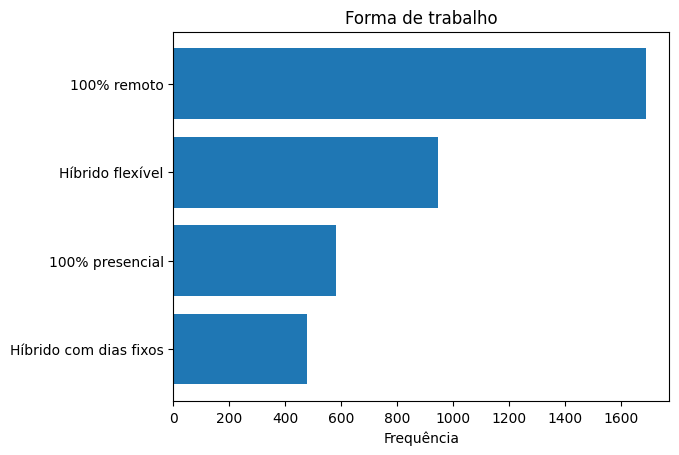

In [26]:
index = ['Híbrido com dias fixos', '100% presencial', 'Híbrido flexível', '100% remoto']
values = df_parte_2.groupby("('P2_p ', 'Atualmente qual a sua forma de trabalho?')")["('P2_p ', 'Atualmente qual a sua forma de trabalho?')"].count().sort_values(ascending=True).values

plt.barh(index, values)
plt.title('Forma de trabalho')
plt.xlabel('Frequência')


Adicionalmente, destaca-se a marcada predominância do trabalho remoto, tanto no formato completamente remoto quanto no modelo híbrido. No setor de Tecnologia da Informação, observa-se uma tendência crescente em relação ao trabalho remoto, impulsionada ainda mais pela influência da pandemia. Esta análise constata que a área de dados segue essa tendência, mantendo-se alinhada com as evoluções do setor.

Text(0.5, 1.0, 'Salário mensal em reais')

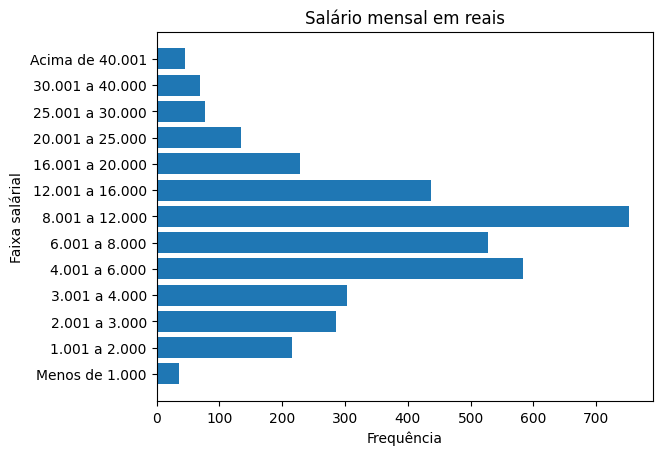

In [27]:
series_salarios = df_parte_2.groupby("('P2_h ', 'Faixa salarial')")["('P2_h ', 'Faixa salarial')"].count()
faixas_ordenadas = ['Menos de R$ 1.000/mês',
                    'de R$ 1.001/mês a R$ 2.000/mês',
                    'de R$ 2.001/mês a R$ 3.000/mês',
                    'de R$ 3.001/mês a R$ 4.000/mês',
                    'de R$ 4.001/mês a R$ 6.000/mês',
                    'de R$ 6.001/mês a R$ 8.000/mês',
                    'de R$ 8.001/mês a R$ 12.000/mês',
                    'de R$ 12.001/mês a R$ 16.000/mês',
                    'de R$ 16.001/mês a R$ 20.000/mês',
                    'de R$ 20.001/mês a R$ 25.000/mês',
                    'de R$ 25.001/mês a R$ 30.000/mês',
                    'de R$ 30.001/mês a R$ 40.000/mês',
                    'Acima de R$ 40.001/mês'
                    ]

labels = ['Menos de 1.000',
          '1.001 a 2.000',
          '2.001 a 3.000',
          '3.001 a 4.000',
          '4.001 a 6.000',
          '6.001 a 8.000',
          '8.001 a 12.000',
          '12.001 a 16.000',
          '16.001 a 20.000',
          '20.001 a 25.000',
          '25.001 a 30.000',
          '30.001 a 40.000',
          'Acima de 40.001']

series_salarios_reordenadas = series_salarios[faixas_ordenadas]
plt.barh(labels, series_salarios_reordenadas.values)
plt.xlabel('Frequência')
plt.ylabel('Faixa salárial')
plt.title('Salário mensal em reais')

Ao analisar o gráfico, percebemos que muitos profissionais na área têm salários mais altos do que a média no Brasil, que foi cerca de R$ 2.449 em 2021, de acordo com a Pnad. Isso sugere que os profissionais de dados estão sendo bem remunerados em comparação com outros setores. Isso pode ser devido à demanda por suas habilidades especializadas e à importância crescente dos dados em várias indústrias.